# <span style="color:gray">ML_Session_4주차_실습</span>  

In [1]:
import pandas as pd
from pandas import DataFrame

import numpy as np
import os

# sklearn
import sklearn

import warnings
warnings.filterwarnings(action='ignore') 

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#matplotlib 한글깨짐 지원
from matplotlib import font_manager, rc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)  

#### 목차  

- [SVM](#SVM)  
    * [하이퍼파라미터](#SVC-하이퍼파라미터)  
    * [선형 SVM](#선형-SVM)  
    * [hard margin vs soft margin](#hard-margin-vs-soft-margin)
    * [비선형 SVM](#비선형-SVM)  
- [Naive Bayes](#Naive-Bayes)  
    * [Gaussian Naive Bayes](#Gaussian-Naive-Bayes-이용)
- [KNN](#KNN)
    * [하이퍼파라미터](#KNN-하이퍼파라미터) 
    * [비교해보기](#비교해보기)
- [Decision Tree](#Decision-Tree)
    * [DT 하이퍼파라미터](#DT-하이퍼파라미터)
    * [결정 트리 학습&시각화](#결정-트리-학습&시각화)
    * [클래스 확률 추정](#클래스-확률-추정)
    * [파라미터 변경](#파라미터-변경)
    * [데이터셋 회전](#데이터셋을-회전할-경우)

---

# SVM

<img src='http://drive.google.com/uc?export=view&id=1I4qH9sGjrYTW0v1mOTw3N8PLX9sXBWX6' /><br>

## <span style='background-color: #fff5b1'>SVC 하이퍼파라미터</span>

```SVC(*, C=1.0, kernel='rbf', degree=3,   
    gamma='scale', coef0=0.0, shrinking=True,   
    probability=False, tol=0.001, cache_size=200,   
    class_weight=None, verbose=False, max_iter=-1,   
    decision_function_shape='ovr', break_ties=False, random_state=None)```

**C** : float, default=1.0  
    Regularization 매개변수, 정규화(Regularization)의 강도는 C에 반비례. 반드시 양수  
    
**kernel** : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'  
    알고리즘에 사용할 커널 유형을 지정  
    
**degree** : int, default=3  
    다항식 커널 함수('poly')의 차수. 다른 커널에서는 무시됨  

**gamma** : {'scale', 'auto'} or float, default='scale'  
    'rbf', 'poly' 및 'sigmoid'에 대한 커널 계수  
    
- gamma='scale'인 경우, 감마 값으로 1/(n_features * X.var())  
- 'auto'인 경우, 감마 값으로 1/n_features를 사용

**coef0** : float, default=0.0  
    커널 함수의 독립항. 'poly'와 'sigmoid'에서만 적용  

## <span style='background-color: #fff5b1'>선형 SVM</span>

In [3]:
# 사용한 데이터 : iris dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

                             제대로 분류되지 않은 경우 vs 적절히 분류된 경우  
<img src='http://drive.google.com/uc?export=view&id=1118rEtYrI0VROdwvbO5GYA8qPEPAg45Q' /><br>  

<img src='http://drive.google.com/uc?export=view&id=1RoribmyzGf8fuX_mWr-5414SAn1tm57-' /><br>

### <span style='background-color: #f5f0ff'>pipeline과 LinearSVC를 사용한 경우</span>

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

### <span style='background-color: #f5f0ff'>SVC를 linear로 설정해서 사용한 경우</span>

In [6]:
from sklearn.svm import SVC

# SVM 분류 모델
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(kernel='linear')

## <span style='background-color: #fff5b1'>hard margin vs soft margin</span>

<img src='http://drive.google.com/uc?export=view&id=1NZFHgUQEp_yELOhPfsEaUBmXYMrxFIvt' /><br>

### <span style='background-color: #f5f0ff'>soft margin</span>

```svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)```  
```svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)```  

**C를 조절하여 마진 오류 조정**  

<img src='http://drive.google.com/uc?export=view&id=119LRoGO-10AJB6h_m7YuXOS7u_JcujQ7' /><br>

## <span style='background-color: #fff5b1'>비선형 SVM</span>

In [7]:
# 사용한 데이터 : make_moons
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

### <span style='background-color: #f5f0ff'>다항 특성을 활용한 선형 SVM</span>  

<span style='background-color: #f1f8ff'>PolynomialFeatures 이용</span>  

<img src='http://drive.google.com/uc?export=view&id=1vagAitxL9XM89qDRgpxEp2yUycrCWUgb' /><br>

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

### <span style='background-color: #f5f0ff'>Kernel-SVM</span>  

Kernel 기법: 주어진 데이터를 고차원 특징 공간으로 사상해주는 것

#### <span style='background-color: #f1f8ff'>다항식 커널 사용</span>  
 
**kernel="poly"**

In [9]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

```SVC(kernel="poly", degree=3, coef0=1, C=5)```  
```SVC(kernel="poly", degree=10, coef0=100, C=5)```  

**degree와 coef0 조정**  

<img src='http://drive.google.com/uc?export=view&id=1kDRf2Dshs3Y4jKKz_ZLNyjcc6XCUcCoY' /><br>

#### <span style='background-color: #f1f8ff'>가우시안 RBF 커널 사용</span>   

**kernel="rbf"**

In [10]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

```SVC(kernel="rbf", gamma=0.1, C=0.001)```  
```SVC(kernel="rbf", gamma=0.1, C=1000)```  
```SVC(kernel="rbf", gamma=5, C=0.001)```  
```SVC(kernel="rbf", gamma=5, C=1000)```  

**gamma와 C 조정**  

<img src='http://drive.google.com/uc?export=view&id=15OZlpmTX_qbx_-GstoEvlUVWKuBAbaYT' /><br>

---

# Naive Bayes

## <span style='background-color: #fff5b1'>Gaussian Naive Bayes 이용</span>

In [11]:
# 사용한 데이터 : iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X,y = load_iris(return_X_y=True) # iris data 불러오고, X(Feature)와 y(결과) 세팅
# X,y 값을 train, test로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [12]:
from sklearn.naive_bayes import GaussianNB

# 나이브베이즈를 가우시안 나이브베이즈로 사용
nb = GaussianNB()

In [13]:
# train 데이터로 학습을 진행, X_test 데이터로 결과를 예측하여 y_pred에 넣기
y_pred = nb.fit(X_train, y_train).predict(X_test)

# 실제 값과 y의 예측값을 비교하여 틀린 개수를 출력
print("Number of mislabeled points out of a total %d proints : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 proints : 4


---

# KNN

<img src='http://drive.google.com/uc?export=view&id=1wvB4M39NEvoSU_9GNUc1AJrFpcYuewon' /><br>

## <span style='background-color: #fff5b1'>KNN 하이퍼파라미터</span>

```KNeighborsClassifier(n_neighbors=5, *, weights='uniform', 
                     algorithm='auto', leaf_size=30, p=2, 
                     metric='minkowski', metric_params=None, n_jobs=None)```

**n_neighbors** : int, default=5  
                이웃수, k

**weights** : {'uniform', 'distance'} or callable, default='uniform'  
                예측에 사용되는 가중치 함수  
                
   - 'uniform' : 균일한 가중. 각 이웃의 모든 포인트는 동일한 가중치를 부여
   - 'distance' : 거리의 역수로 가중치를 부여. 이 경우 포인트의 가까운 이웃이 멀리 있는 이웃보다 더 큰 영향을 미침

**algorithm** : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'  
                가장 가까운 이웃을 계산하는 데 사용되는 알고리즘  

**p** : int, default=2  
                Minkowski 메트릭에 대한 검정력 매개변수  
                p=1은 맨하튼 거리. p=2는 유클리드 거리를 사용하는 것과 같음  

**metric** : str or callable, default='minkowski'  
                거리 계산에 사용할 미터법. p = 2일 때 표준 유클리드 거리  
                유효한 메트릭 값 참조 | [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) & [distance_metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics)

## <span style='background-color: #fff5b1'>비교해보기</span>

### <span style='background-color: #f5f0ff'>예측값으로 비교</span>  

In [14]:
# 사용한 데이터 : iris dataset
from sklearn.datasets import load_iris

iris=load_iris()
df=pd.merge(DataFrame(iris['data'], columns=iris['feature_names']),
        DataFrame(iris['target']).rename(columns={0:'target'}),
        left_index=True, right_index=True)

predictors=iris['feature_names']
X=df[predictors]
y=df['target']

In [15]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)
KNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [16]:
pred_y = KNN.predict(X)

# KNN 분류 결과의 평균 정확도(mean accuracy)
KNN.score(X,y)

from sklearn.metrics import confusion_matrix
# 혼동행렬
cm = confusion_matrix(y, pred_y)
cm2 = DataFrame(cm).rename(index={0:'실제값(0)',1:'실제값(1)',2:'실제값(2)'},
                          columns={0:'예측값(0)',1:'예측값(1)',2:'예측값(2)'})

KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)  
평균 정확도:  0.96  
<img src='http://drive.google.com/uc?export=view&id=16UsF6ZIwJWTVzCnTn94We11DAyG8T5MG' align='left'/>
</br></br></br></br></br>  
</br>  

KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)  
평균 정확도:  0.9666666666666667  
<img src='http://drive.google.com/uc?export=view&id=1SHIrgj3w4hOC9zGvi0RutWYKWqOl5Zg0' align='left'/>
</br></br></br></br></br>  
</br>  

KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)  
평균 정확도:  1.0  
<img src='http://drive.google.com/uc?export=view&id=1WmWMTqyNE699ufjIjPUonUTKeD46MwX8' align='left'/><br>

### <span style='background-color: #f5f0ff'>시각화해서 비교</span>  

코드는 아래 사진중 첫번째만  

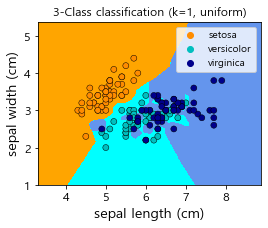

In [17]:
# 시각화를 위한 패키지
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors, datasets
import numpy as np

iris=load_iris()

# K-최근접이웃 분류의 시각화를 좌표평면에 하기 위해서는 예측변수를 2개까지만 사용할 수 있음
# sepal length (cm)와 sepal width (cm)의 값만 뽑아 2차 배열로 변환
X2 = np.array(df[predictors[0:2]])

# 그래프 사이즈 설정
plt.figure(figsize=(4,3))

# color map 설정
cmap_light = ListedColormap(['orange', 'cyan','cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# 앞서 정확도가 가장 높았던 파라미터를 입력함
neigh2 = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
neigh2.fit(X2, y)
 
# 분류 경계를 색으로 구분하기 위한 작업
h = .02  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = neigh2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# 분류 경계 별 색칠하기
plt.contourf(xx, yy, Z, cmap=cmap_light)
 
# 각 훈련값의 좌표들을 그린 산점도
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
 
# 제목에 KNN 분류 파라미터 표기
plt.title("3-Class classification (k=1, uniform)")
plt.xlabel(predictors[0])
plt.ylabel(predictors[1])

plt.show()

<img src='http://drive.google.com/uc?export=view&id=18h4oCtmORb9HzoQILGQzEsXbxFWBBNKW' /><br>

---

# Decision Tree

## <span style='background-color: #fff5b1'>DT 하이퍼파라미터</span>

```DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, 
                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                       max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)```

**max_depth** : int, default=None  
최대 깊이 지정  

**min_samples_split** : int or float, default=2  
분할되기 위해 노드가 가져야 하는 최고 샘플 수  

**min_samples_leaf** : int or float, default=1  
리프 노드가 가지고 있어야 할 최소 샘플 수  

**max_features** : int, float or {"auto", "sqrt", "log2"}, default=None  
각 노드에서 분할에 사용할 feature의 최대 수  

**max_leaf_nodes** : int, default=None  
리프 노드의 최대수  

### <span style='background-color: #f5f0ff'>결정트리 과정</span>  

<img src='http://drive.google.com/uc?export=view&id=1YptT81joW79QB129b08DmfOP37nxvVVf' /><br>

## <span style='background-color: #fff5b1'>결정 트리 학습&시각화</span>

### <span style='background-color: #f5f0ff'>iris 모든 column 이용</span>  

In [18]:
# 사용한 데이터 : iris dataset
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, :]
y = iris.target

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

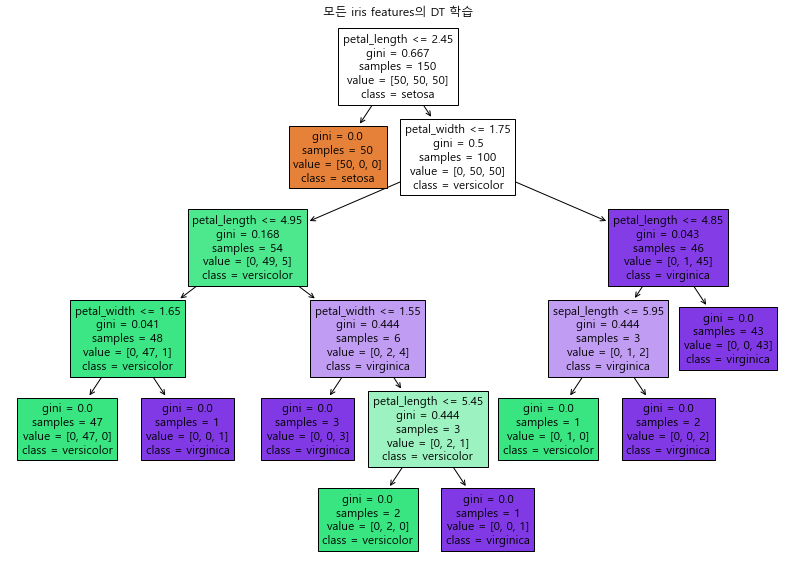

In [20]:
from sklearn.tree import plot_tree

explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize=(14,10))
plot_tree(tree_clf, feature_names = explt_vars, class_names = fct_val, filled = True)

plt.title("모든 iris features의 DT 학습") 
plt.show()

### <span style='background-color: #f5f0ff'>iris 꽃잎 길이&너비 이용 / max_depth=2</span>  

In [21]:
iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

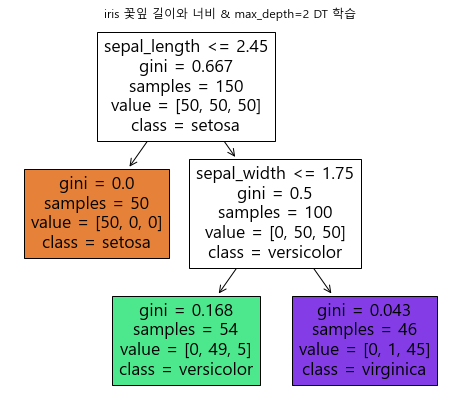

In [22]:
plt.figure(figsize=(8,7))
plot_tree(tree_clf, feature_names = explt_vars, class_names = fct_val, filled = True)

plt.title("iris 꽃잎 길이와 너비 & max_depth=2 DT 학습") 
plt.show()

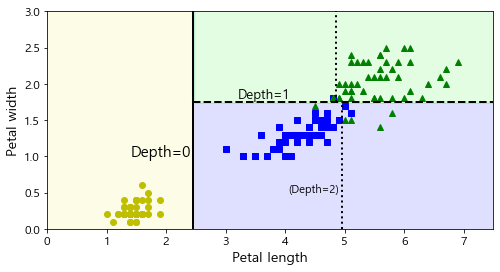

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## <span style='background-color: #fff5b1'>클래스 확률 추정</span>

In [24]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [25]:
tree_clf.predict([[5, 1.5]])

array([1])

## <span style='background-color: #fff5b1'>파라미터 변경</span>

### <span style='background-color: #f5f0ff'>random_state 변경했을 때</span>  

In [26]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

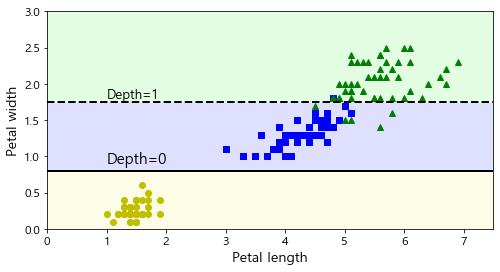

In [27]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

### <span style='background-color: #f5f0ff'>min_samples_leaf 변경</span>  

분할되기 위해 노드가 가져야 하는 최고 샘플 수  
작게 설정할 수록 분할되는 노드가 많아져 과적합 가능성 증가  

In [28]:
# 사용한 데이터 : make_moons
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=53)

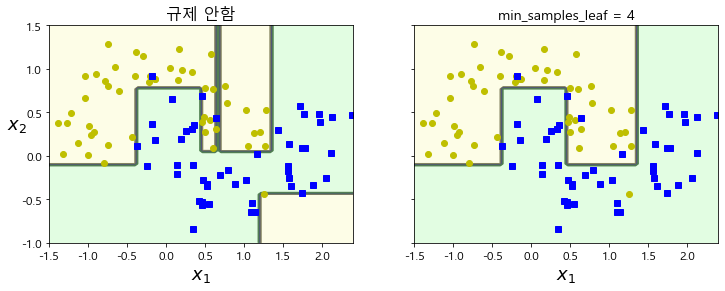

In [29]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(X, y)
deep_tree_clf2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, X, y, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("규제 안함", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, X, y, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

## <span style='background-color: #fff5b1'>데이터셋을 회전할 경우</span>

데이터셋을 회전하면 다른 결정 경계를 만듦

In [47]:
iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

# 회전
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

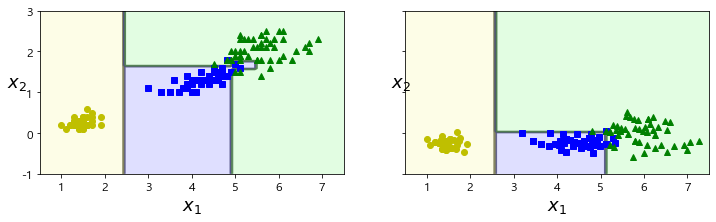

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(12,3), sharey=True)

# 기존 데이터
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)
# 회전한 데이터
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y, axes=[0.5, 7.5, -1.0, 3], iris=False)

plt.sca(axes[1])
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 3], iris=False)

plt.show()

In [49]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

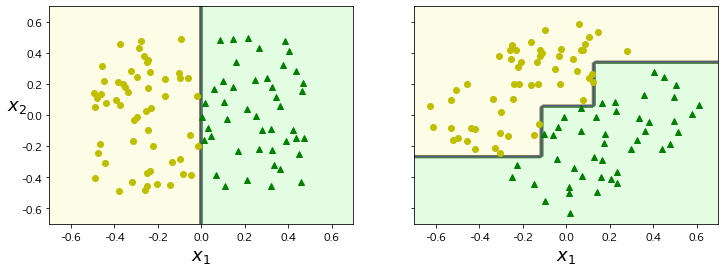

In [50]:
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()